# Exploring the Building Elevation and Subgrade (BES) Dataset for New York City in Python
Mark Bauer

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import urllib
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [2]:
# Printing verions of Python modules and packages with **watermark** - the IPython magic extension.
%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
matplotlib: 3.5.2
seaborn   : 0.11.2



![cover-photo](images/dataset-cover-photo.png)

Link to dataset website: https://data.cityofnewyork.us/City-Government/Building-Elevation-and-Subgrade-BES-/bsin-59hv

# Download data dictionary

In [3]:
# download url of data dictionary
url = 'https://data.cityofnewyork.us/api/views/bsin-59hv/files/03455783-2880-43f9-9e53-718ecb353c47\
?download=true&filename=Building_Elevation_and_Subgrade-Data_Dictionary.xlsx'

file_name = 'Building_Elevation_and_Subgrade-Data_Dictionary.xlsx'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls

Building Elevation and Subgrade Dataset Guidance.pdf
Building_Elevation_and_Subgrade-Data_Dictionary.xlsx
README.md
exploratory.ipynb
images/


# Download dataset guidance PDF

In [4]:
# download url of dataset guidance
url = 'https://data.cityofnewyork.us/api/views/bsin-59hv/files/ae1b369c-6ce1-4805-9ad0-aca9f62f3182\
?download=true&filename=Building%20Elevation%20and%20Subgrade%20Dataset%20Guidance.pdf'

file_name = 'Building Elevation and Subgrade Dataset Guidance.pdf'
urllib.request.urlretrieve(url, file_name)

# sanity check to confirm download
%ls

Building Elevation and Subgrade Dataset Guidance.pdf
Building_Elevation_and_Subgrade-Data_Dictionary.xlsx
README.md
exploratory.ipynb
images/


# Exploratory Data Analysis
Link to dataset website: https://data.cityofnewyork.us/City-Government/Building-Elevation-and-Subgrade-BES-/bsin-59hv

In [5]:
# read in data from NYC Open Data
url = 'https://data.cityofnewyork.us/api/views/bsin-59hv/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# preview data
rows, cols = df.shape
print('rows: {:,}\ncolumns: {}'.format(rows, cols))
df.head()

rows: 861,876
columns: 26


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


In [6]:
# preview datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861876 entries, 0 to 861875
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   the_geom    861876 non-null  object 
 1   bin         861876 non-null  int64  
 2   bbl         861876 non-null  int64  
 3   borough     861875 non-null  float64
 4   block       861875 non-null  float64
 5   lot         861876 non-null  int64  
 6   address     844875 non-null  object 
 7   z_grade     861876 non-null  float64
 8   z_floor     861876 non-null  float64
 9   subgrade    861876 non-null  object 
 10  notes1      861876 non-null  object 
 11  notes2      202458 non-null  object 
 12  notes3      472003 non-null  object 
 13  x           861876 non-null  float64
 14  y           861876 non-null  float64
 15  latitude    861876 non-null  float64
 16  longitude   861876 non-null  float64
 17  pluto_bbl   861876 non-null  int64  
 18  Council     861876 non-null  int64  
 19  Bo

In [7]:
# preview null counts per column
df.isnull().sum()

the_geom           0
bin                0
bbl                0
borough            1
block              1
lot                0
address        17001
z_grade            0
z_floor            0
subgrade           0
notes1             0
notes2        659418
notes3        389873
x                  0
y                  0
latitude           0
longitude          0
pluto_bbl          0
Council            0
BoroCD             0
CTLabel            0
BoroCT2020         0
NTA2020            0
NTAName            0
CDTA2020           0
CDTAName           0
dtype: int64

In [8]:
# summary statistics of selected numeric columns
cols = [
    'bin', 'bbl', 'borough', 'block', 'lot', 'address',
    'z_grade', 'z_floor',  'x', 'y', 'latitude', 'longitude',
]

df.loc[:, cols].describe()

,bin,bbl,borough,block,lot,z_grade,z_floor,x,y,latitude,longitude
count,8.618760e+05,8.618760e+05,861875.000000,861875.000000,861876.000000,861876.000000,861876.000000,8.618760e+05,861876.000000,861876.000000,861876.000000
mean,3.610723e+06,3.517133e+09,3.464081,5310.378502,152.170014,53.915012,58.113704,1.006345e+06,191685.085757,40.692719,-73.920238
std,1.053307e+06,1.034376e+09,1.026240,3725.973701,835.862079,42.192895,42.560673,3.288964e+04,30587.626141,0.083946,0.118567
min,1.000003e+06,1.090961e+06,1.000000,1.000000,0.000000,-13.096000,0.000000,9.132653e+05,120977.993002,40.498478,-74.255266
25%,3.089156e+06,3.032080e+09,3.000000,2295.000000,18.000000,23.304000,27.438000,9.893564e+05,168135.316338,40.628135,-73.981596
50%,4.026428e+06,4.010520e+09,4.000000,4860.000000,38.000000,44.328000,48.370000,1.009009e+06,189533.841782,40.686807,-73.910686
75%,4.259005e+06,4.105200e+09,4.000000,7498.000000,64.000000,72.709250,77.063000,1.030179e+06,211378.936954,40.746741,-73.834218
max,5.799523e+06,6.000000e+09,5.000000,99999.000000,9999.000000,402.839000,404.397000,1.067283e+06,272622.861956,40.914923,-73.700369


In [9]:
# summary statistics string columns
df.describe(include=['O'])

,the_geom,address,subgrade,notes1,notes2,notes3,NTA2020,NTAName,CDTA2020,CDTAName
count,861876,844875,861876,861876,202458,472003,861876,861876,861876,861876
unique,861876,796756,2,12,9,2,256,256,71,72
top,POINT (-74.22274561187417 40.52134422844183),FINGERBOARD ROAD,Y,Property was Successfully Measured,"Commercial, Industrial or other Non-Residentia...",Visible Door or Window in subgrade space,SI0302,Great Kills-Eltingville,SI03,SI03 South Shore (CD 3 Approximation)
freq,1,423,472003,646782,112354,310268,16194,16194,48095,48095


In [10]:
# building identification number is unique?
is_unique = df['bin'].is_unique

print('bin is unique: {}'.format(is_unique))

bin is unique: True


# Examining the building elevation fields

![images](images/building-elevation-fields.png)

Screenshot of elevation columns from data dictionary

![images](images/notes1-descriptions.png)

Screenshot of notes_1 column data dictionary

The `notes_1` column seems to tell us interesting information. Let's examine further and see what's there.

In [11]:
# preview building elevation measurements notes and count of unique values
df['notes1'].value_counts()

Property was Successfully Measured                                                                                                      646782
Property not Visible Due to Construction or Obstruction                                                                                 115281
Property was Successfully Measured; No Address Plate or Identification on Building                                                       61567
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building                                  17132
Property not Visible from Street; No Address Plate or Identification on Building                                                         12080
Property was Successfully Measured; Property Under Construction                                                                           2946
Vacant Lot; No Address Plate or Identification on Building                                                                                1957

In [12]:
# how many properties were successfully measured?
count = len(df.loc[df['notes1'] == 'Property was Successfully Measured'])
measured_perc = count / len(df) * 100

print("% of properties with 'Property was Successfully Measured' \
and no additional notes: {:.2f}%".format(measured_perc))

% of properties with 'Property was Successfully Measured' and no additional notes: 75.04%


In [13]:
# how many properties were successfully measured by NTA?
nta_counts = (
    df
    .groupby(by='NTAName')['bin']
    .count()
    .rename('count')
    .reset_index()
)

nta_counts_measured = (
    df
    .loc[df['notes1'] == 'Property was Successfully Measured']
    .groupby(by='NTAName')['bin']
    .count()
    .rename('count_measured')
    .reset_index()
)

# preview count measured dataframe
nta_counts_measured.head()

,NTAName,count_measured
0,Allerton,1335
1,Annadale-Huguenot-Prince's Bay-Woodrow,9492
2,Arden Heights-Rossville,7848
3,Astoria (Central),2885
4,Astoria (East)-Woodside (North),3002


In [14]:
# merge both counts and count measured dataframes
nta_counts_merged = nta_counts.merge(
    nta_counts_measured,
    on='NTAName',
    how='left'
)

nta_counts_merged['perc_measured'] = nta_counts_merged['count_measured'] / nta_counts_merged['count'] * 100

# table of percent measured in ascending order by NTA
(nta_counts_merged
 .sort_values(by='perc_measured')
 .head(20)
 .reset_index(drop=True)
)

,NTAName,count,count_measured,perc_measured
0,Pelham Bay Park,92,1.0,1.086957
1,Bronx Park,60,1.0,1.666667
2,Central Park,52,1.0,1.923077
3,Van Cortlandt Park,47,1.0,2.127660
4,Ferry Point Park-St. Raymond Cemetery,44,1.0,2.272727
5,Randall's Island,148,4.0,2.702703
6,Prospect Park,48,2.0,4.166667
7,The Battery-Governors Island-Ellis Island-Libe...,15,1.0,6.666667
8,Cunningham Park,14,1.0,7.142857
9,Inwood Hill Park,13,1.0,7.692308


There are some small values, so let's filter building counts of only > 1000.

In [15]:
# table of percent measured in ascending order where count of buildings > 1000 by NTA
(nta_counts_merged
 .loc[nta_counts_merged['count'] > 1000]
 .sort_values(by='perc_measured')
 .head(20)
 .reset_index(drop=True)
)

,NTAName,count,count_measured,perc_measured
0,Clinton Hill,2262,770.0,34.040672
1,Park Slope,6723,2381.0,35.415737
2,Fort Greene,2085,742.0,35.587530
3,Brooklyn Heights,1457,553.0,37.954701
4,Hamilton Heights-Sugar Hill,1623,636.0,39.186691
5,Upper West Side (Central),2755,1102.0,40.000000
6,Sunset Park (Central),4205,1708.0,40.618312
7,Carroll Gardens-Cobble Hill-Gowanus-Red Hook,7196,3156.0,43.857699
8,Prospect Heights,1798,797.0,44.327030
9,Bedford-Stuyvesant (East),8940,3989.0,44.619687


Now let's examine percent of buildings measured in descending order.

In [16]:
# table of percent measured in descending order by NTA
(nta_counts_merged
 .sort_values(by='perc_measured', ascending=False)
 .head(20)
 .reset_index(drop=True)
)

,NTAName,count,count_measured,perc_measured
0,Holy Cross Cemetery,1,1.0,100.000000
1,Hollis,4126,3711.0,89.941832
2,Cambria Heights,5311,4773.0,89.870081
3,Queens Village,11852,10650.0,89.858252
4,Westerleigh-Castleton Corners,9101,8124.0,89.264916
5,Bayside,8615,7678.0,89.123622
6,Oakwood-Richmondtown,6106,5408.0,88.568621
7,Murray Hill-Broadway Flushing,7693,6809.0,88.509034
8,South Richmond Hill,3606,3174.0,88.019967
9,South Ozone Park,14474,12708.0,87.798812


Map and visualize these percentages by NTA.

In [17]:
# reading in NTA shape
url = 'https://data.cityofnewyork.us/api/geospatial/9nt8-h7nd?accessType=DOWNLOAD&method=export&format=Shapefile'
gdf = gpd.read_file(url)

gdf = gdf.to_crs(2263)
gdf.head()

,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23..."
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21..."
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19..."
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436..."
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ..."


In [18]:
gdf_merged = (
    gdf.merge(
        nta_counts_merged,
        left_on='ntaname',
        right_on='NTAName'
    )
)

gdf_merged.head()

,borocode,boroname,countyfips,nta2020,ntaname,ntaabbrev,ntatype,cdta2020,cdtaname,shape_leng,shape_area,geometry,NTAName,count,count_measured,perc_measured
0,1.0,Manhattan,061,MN6491,Central Park,CntrlPk,9,MN64,MN64 Central Park (JIA 64 Equivalent),32721.097429,3.831238e+07,"POLYGON ((997412.248 230101.816, 997436.269 23...",Central Park,52,1.0,1.923077
1,1.0,Manhattan,061,MN0401,Chelsea-Hudson Yards,Chls_HdsYd,0,MN04,MN04 Chelsea-Hell's Kitchen (CD 4 Approximation),40095.235570,2.967175e+07,"POLYGON ((983031.177 217138.506, 983640.320 21...",Chelsea-Hudson Yards,2042,1095.0,53.623898
2,1.0,Manhattan,061,MN0301,Chinatown-Two Bridges,Chntwn,0,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),16464.371337,1.154263e+07,"POLYGON ((987256.457 200392.989, 987090.306 19...",Chinatown-Two Bridges,1106,654.0,59.132007
3,1.0,Manhattan,061,MN1102,East Harlem (North),EstHrlm_N,0,MN11,MN11 East Harlem (CD 11 Equivalent),28710.999462,2.610451e+07,"MULTIPOLYGON (((1004410.678 229781.419, 100436...",East Harlem (North),1972,1318.0,66.835700
4,1.0,Manhattan,061,MN1101,East Harlem (South),EstHrlm_S,0,MN11,MN11 East Harlem (CD 11 Equivalent),18682.264948,1.665394e+07,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",East Harlem (South),1019,577.0,56.624141


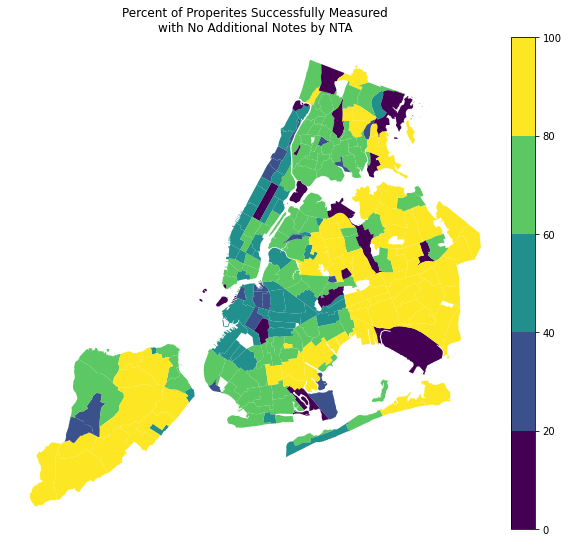

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm([0, 20, 40, 60, 80, 100], cmap.N)

gdf_merged.plot(
    column='perc_measured',
    legend=True,
    cmap=cmap,
    cax=cax,
    norm=norm,
    ax=ax
)

ax.set_title('Percent of Properites Successfully Measured\n\
with No Additional Notes by NTA', fontsize=12)
ax.axis('off')
plt.tight_layout()

# Previewing building elevation measurements of zero
Insight from data dictionary.

In [20]:
# summary statistics
(df
 .loc[:, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,861876.000000,861876.000000
mean,53.915012,58.113704
std,42.192895,42.560673
min,-13.096000,0.000000
25%,23.304000,27.438000
50%,44.328000,48.370000
75%,72.709250,77.063000
max,402.839000,404.397000


In [21]:
print('z_grade = 0')
print('counts:', df.loc[df['z_grade'] == 0].shape[0])
print()

print('z_floor = 0')
print('counts:', df.loc[df['z_floor'] == 0].shape[0])

z_grade = 0
counts: 14039

z_floor = 0
counts: 14038


Interesting that there is one building that doesn't reconcile. Let's examine.

In [22]:
(df
 .loc[df['z_grade'] == 0, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,14039.0,14039.000000
mean,0.0,0.003058
std,0.0,0.362312
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,0.000000
max,0.0,42.929000


Review notes.

In [23]:
(df
 .loc[df['z_grade'] == 0, ['notes1']]
 .value_counts()
)

notes1                                                                                                       
Property not Visible from Street; No Address Plate or Identification on Building                                 12079
Vacant Lot; No Address Plate or Identification on Building                                                        1957
Property not Visible Due to Construction or Obstruction                                                              1
Property not Visible from Street; No Address Plate or Identification on Building; Property Under Construction        1
Property was Successfully Measured                                                                                   1
dtype: int64

In [24]:
(df
 .loc[df['z_floor'] == 0, ['notes1']]
 .value_counts()
)

notes1                                                                                                       
Property not Visible from Street; No Address Plate or Identification on Building                                 12079
Vacant Lot; No Address Plate or Identification on Building                                                        1957
Property not Visible Due to Construction or Obstruction                                                              1
Property not Visible from Street; No Address Plate or Identification on Building; Property Under Construction        1
dtype: int64

In [25]:
df.loc[
    (df['z_grade'] == 0)
    & (df['z_floor'] != 0)
]

,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
293514,POINT (-73.93461320916565 40.65265373387812),3109155,3048820020,3.0,4882.0,20,372 EAST 46 STREET,0.0,42.929,Y,...,-73.934613,3048820020,41,317,872.0,3087200,BK1703,East Flatbush-Rugby,BK17,BK17 East Flatbush (CD 17 Approximation)


I guess I'll drop this record for now, as it has two conflicting data points. Perhaps it could have a `z_floor `elevation and still have `z_grade` of zero, but I will drop for now. There are also some buildings below grade. We can keep them for now, but it might be worth examining in the future.

In [26]:
# count of buildings below grade
df.loc[df['z_grade'] < 0].shape[0]

11

In [27]:
df = (
    df
    .loc[df['z_grade'] != 0]
    .reset_index(drop=True)
)

print('new shape of data:', df.shape)
df.head()

new shape of data: (847837, 26)


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


In [28]:
# summary statistics
(df
 .loc[:, ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,847837.000000,847837.000000
mean,54.807770,59.075935
std,41.961752,42.244068
min,-13.096000,0.703000
25%,24.228000,28.361000
50%,45.095000,49.224000
75%,73.343000,77.705000
max,402.839000,404.397000


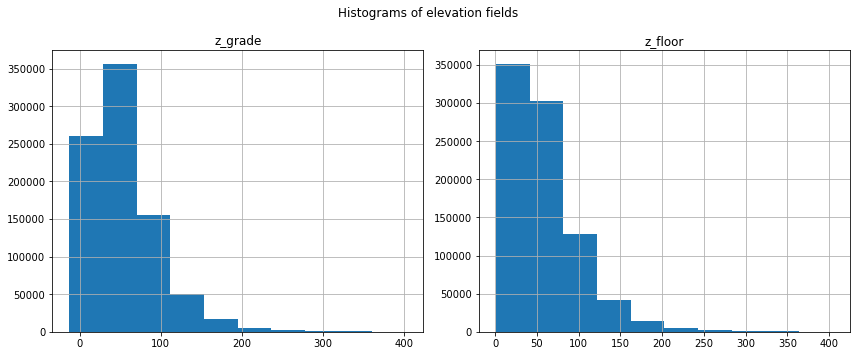

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

(df
 .loc[:, ['z_grade', 'z_floor']]
 .hist(ax=ax)
)

plt.suptitle('Histograms of elevation fields')
plt.tight_layout()

# Examine z_grade > z_floor

In [30]:
df.loc[df['z_grade'] > df['z_floor']].shape

(316, 26)

In [31]:
(df
 .loc[df['z_grade'] > df['z_floor'], ['z_grade', 'z_floor']]
 .describe()
)

,z_grade,z_floor
count,316.000000,316.000000
mean,63.805082,63.000617
std,37.790595,37.731248
min,6.513000,6.211000
25%,35.894000,35.107250
50%,55.554500,54.859500
75%,84.853250,84.248750
max,260.812000,260.770000


In [32]:
(df
 .loc[df['z_grade'] > df['z_floor'], ['notes1']]
 .value_counts()
)

notes1                                                                                                                              
Property was Successfully Measured                                                                                                      246
Property was Successfully Measured; No Address Plate or Identification on Building                                                       34
Property not Visible Due to Construction or Obstruction                                                                                  13
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building                                  10
Property not Visible Due to Construction or Obstruction; No Address Plate or Identification on Building; Property Under Construction      5
Property not Visible Due to Construction or Obstruction; Property Under Construction                                                      3
Property was Successfully M

I need to examine the data dictionary further as to why `z_grade` would be higher than `z_floor`. Dropping for now.

In [33]:
df = (
    df
    .loc[df['z_grade'] <= df['z_floor']]
    .reset_index(drop=True)
)

print('new shape of data:', df.shape)
df.head()

new shape of data: (847521, 26)


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


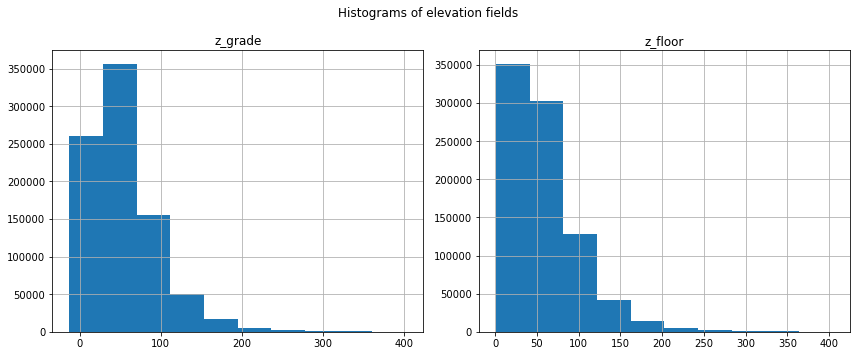

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

(df
 .loc[:, ['z_grade', 'z_floor']]
 .hist(ax=ax)
)

plt.suptitle('Histograms of elevation fields')
plt.tight_layout()

# Calculating height from building grade to floor

In [35]:
# height from building floor to grade
df['z_floor_grade'] = df['z_floor'] - df['z_grade']

df['z_floor_grade'].describe()

count    847521.000000
mean          4.270057
std           3.085785
min           0.000000
25%           2.019000
50%           3.628000
75%           6.574000
max          94.440000
Name: z_floor_grade, dtype: float64

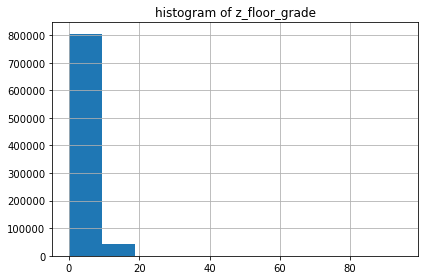

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

df['z_floor_grade'].hist(ax=ax)

plt.title('histogram of z_floor_grade')
plt.tight_layout()

In [37]:
df.sort_values(by='z_floor_grade', ascending=False).head()

,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName,z_floor_grade
346655,POINT (-73.93574209682842 40.69593398364827),3042945,3015890032,3.0,1589.0,32,376 VERNON AVENUE,73.010,167.450,N,...,3015890032,36,303,287.0,3028700,BK0302,Bedford-Stuyvesant (East),BK03,BK03 Bedford-Stuyvesant (CD 3 Approximation),94.440
350565,POINT (-73.9164740122271 40.673868341503415),3388026,3014530007,3.0,1453.0,7,347 SARATOGA AVENUE,11.519,100.161,N,...,3014530007,41,316,303.0,3030300,BK1601,Ocean Hill,BK16,BK16 Ocean Hill-Brownsville (CD 16 Approximation),88.642
645698,POINT (-73.93178728594395 40.85598475936347),1064098,1021700370,1.0,2170.0,370,45 WADSWORTH TERRACE,110.057,193.816,Y,...,1021700370,10,112,279.0,1027900,MN1202,Washington Heights (North),MN12,MN12 Washington Heights-Inwood (CD 12 Equivalent),83.759
658869,POINT (-73.942791536969 40.845811583256236),1063433,1021390293,1.0,2139.0,293,138 HAVEN AVENUE,110.309,192.820,Y,...,1021390293,10,112,255.0,1025500,MN1201,Washington Heights (South),MN12,MN12 Washington Heights-Inwood (CD 12 Equivalent),82.511
654017,POINT (-73.94335667521972 40.84297641132326),1063401,1021390030,1.0,2139.0,30,50 HAVEN AVENUE,79.612,160.651,Y,...,1021390030,10,112,255.0,1025500,MN1201,Washington Heights (South),MN12,MN12 Washington Heights-Inwood (CD 12 Equivalent),81.039


Some of these values might be a little high, but more analysis is required to confirm.

Please note: this was a very quick analysis.